In [72]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
from sklearn.datasets import fetch_openml
# Load the Boston house prices dataset
boston = fetch_openml(name='boston', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [74]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [75]:
# Checking Description of dataset
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [76]:
print(boston.data)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [77]:
print(boston.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


# Preparing Data

In [78]:
dataset = pd.DataFrame(boston.data)

In [79]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


# Summarizing the Stata of Data

In [81]:
dataset.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [82]:
#checking for missing values
dataset.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
# Exploratory Data Analysis
# Correlation

dataset.corr()

<ipython-input-83-137e3f18fb0e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044
B,-0.385064,0.175520,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.441808,-0.177383,1.000000,-0.366087


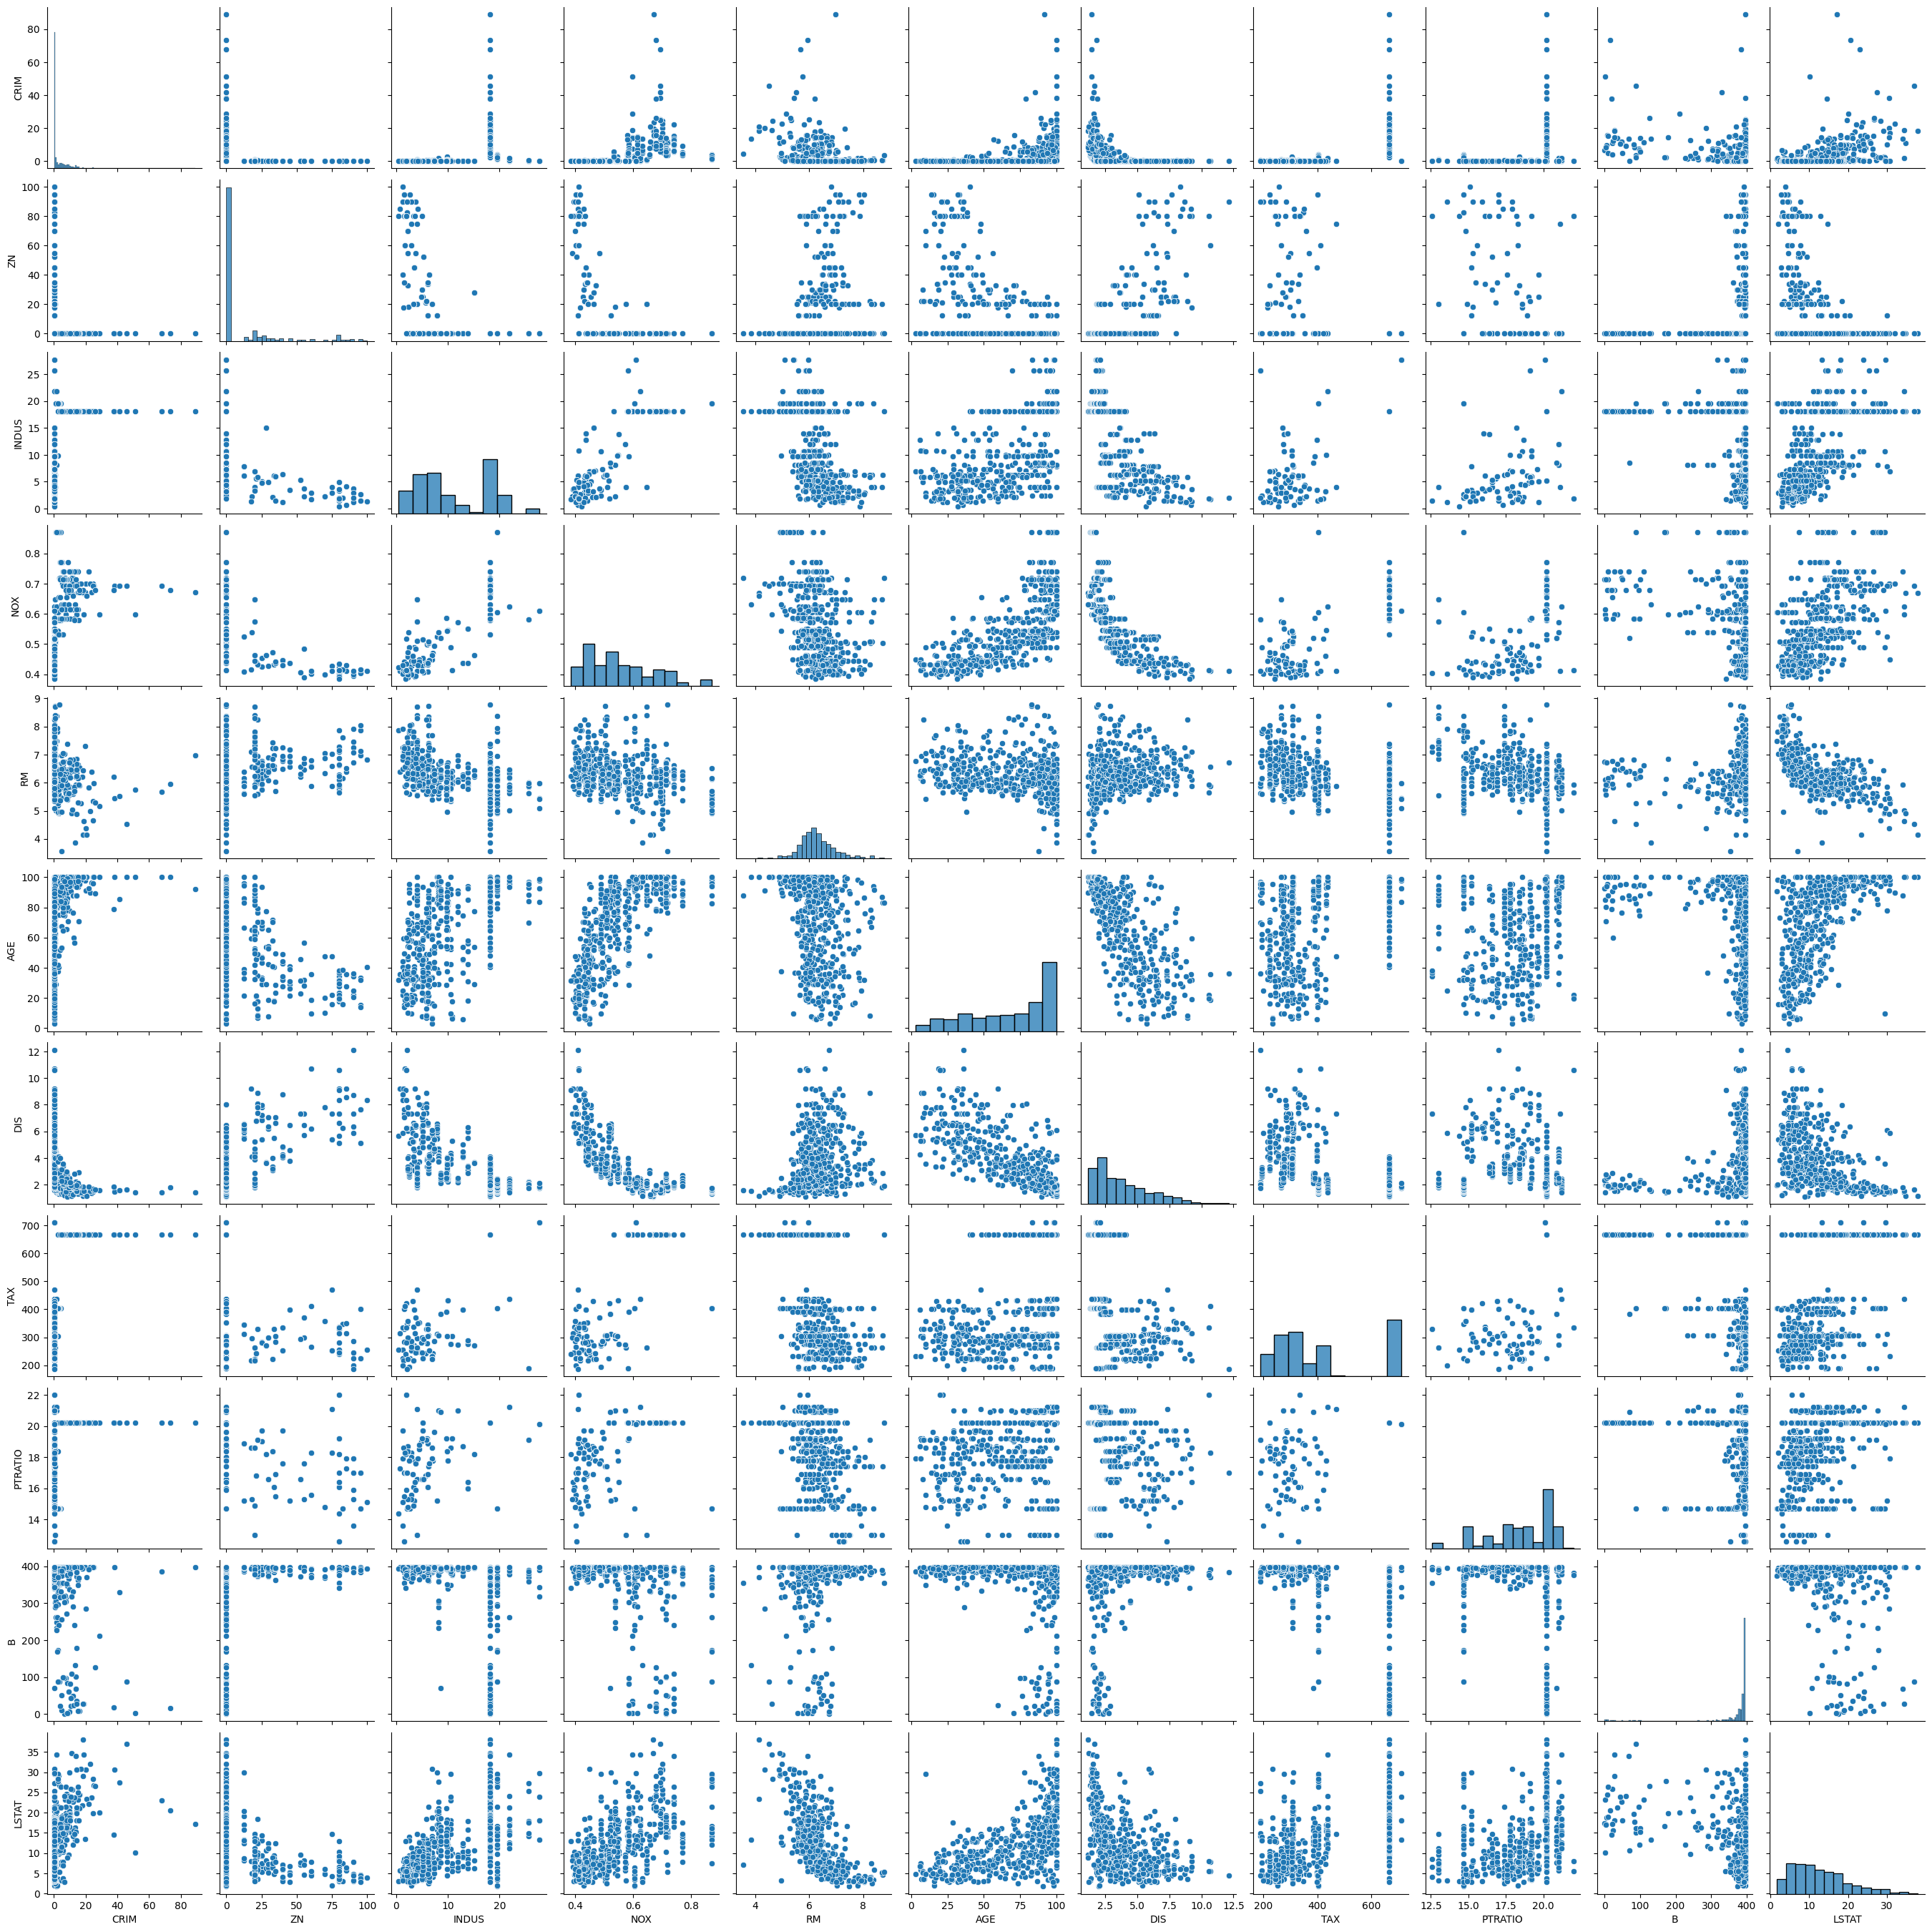

In [84]:
import seaborn as sns
sns.pairplot(dataset)

Text(0, 0.5, 'distances to employment centres')

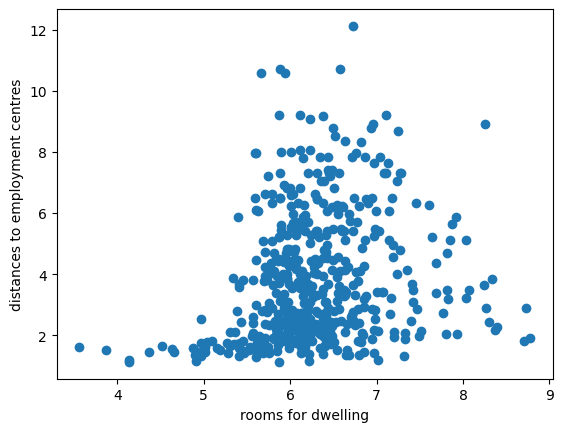

In [85]:
plt.scatter(dataset['RM'], dataset['DIS'])
plt.xlabel('rooms for dwelling')
plt.ylabel('distances to employment centres')

<Axes: xlabel='RM', ylabel='AGE'>

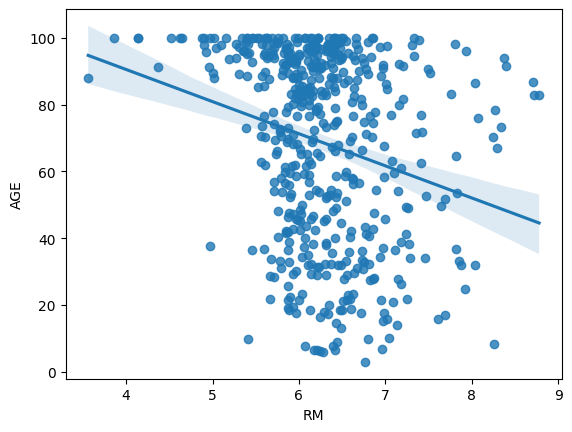

In [86]:
import seaborn as sns
sns.regplot(x='RM', y='AGE', data = dataset)

<Axes: xlabel='LSTAT', ylabel='AGE'>

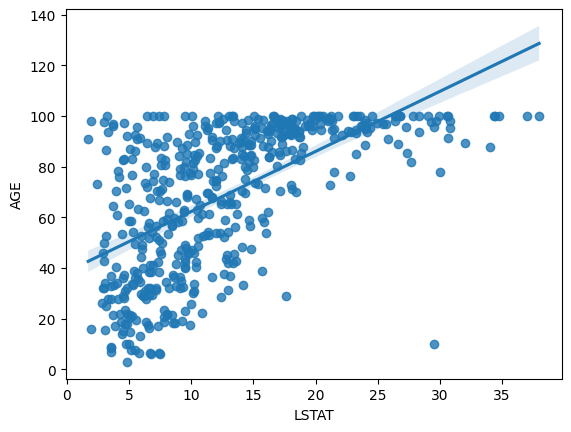

In [87]:
sns.regplot(x='LSTAT', y='AGE', data = dataset)

<Axes: xlabel='INDUS', ylabel='DIS'>

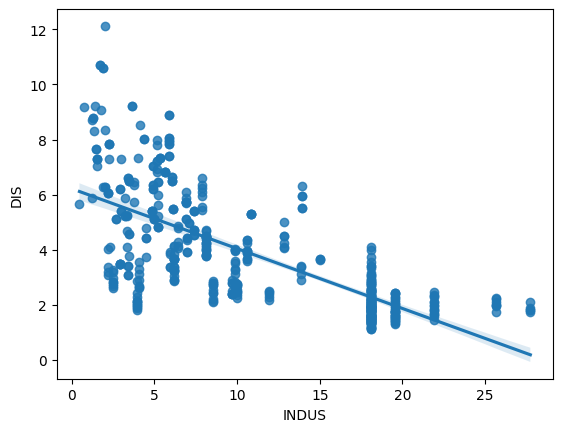

In [88]:
sns.regplot(x='INDUS', y='DIS', data = dataset)

<Axes: xlabel='PTRATIO', ylabel='AGE'>

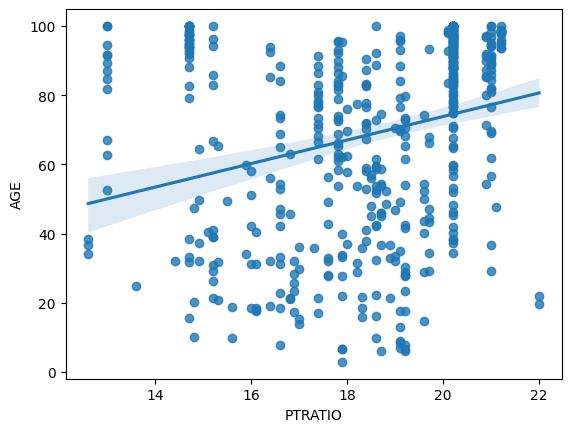

In [89]:
sns.regplot(x='PTRATIO', y='AGE', data = dataset)

In [90]:
## Independent and Dependent Features

X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [91]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90


In [92]:
Y.head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

In [93]:
# Train, Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3, random_state=42)

In [94]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85


In [95]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09
...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666.0,20.2,385.96
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666.0,20.2,100.19


In [96]:
Y_train

5       5.21
116    12.04
45     10.21
16      6.58
468    18.13
       ...  
106    18.66
270    13.00
348     5.99
435    23.27
102    10.63
Name: LSTAT, Length: 354, dtype: float64

In [97]:
Y_test

173     9.04
274     3.53
491    18.07
72      5.52
452    17.27
       ...  
441    19.52
23     19.88
225     4.63
433    16.22
447    16.44
Name: LSTAT, Length: 152, dtype: float64

## Standardize the Dataset

In [121]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [99]:
X_train = scalar.fit_transform(X_train)

In [100]:
X_test = scalar.transform(X_test)

## Model Training

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
regression=LinearRegression()

In [103]:
regression.fit(X_train,Y_train)

LinearRegression()

In [104]:
## print the coefficients and the intercept
print(regression.coef_)

[ 0.57490557  0.42075487  0.28493075 -0.48539392  1.2778386  -3.14654938
  2.0241238   0.33873078  0.55597272 -0.18016026  0.42327354 -0.61745815]


In [105]:
print(regression.intercept_)

12.421129943502825


In [106]:
##  parameters on which the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [107]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [108]:
reg_pred

array([11.11348689,  4.5402001 , 16.20493759,  7.14428004, 16.87635436,
       11.23581488, 14.3905525 , 15.400764  , 15.08151928, 13.97451058,
       12.85788896, 14.0121629 , 29.86058647,  9.97748099, 14.39665696,
       11.09584229, 16.39585384, 24.14514224,  1.33258814, 18.06504828,
        7.51059025,  7.56310481, 16.72758851, 10.84307098, 18.98068847,
       19.98475199, 10.1446355 , 18.17501443, 12.42550891, 14.39457799,
       15.11890507,  9.5611327 , 13.1651471 , 21.81029811, 17.31276368,
       20.31644224,  6.20953324, 11.994757  ,  9.69198168,  6.34335723,
       16.31955247,  8.94691062,  0.96677074, 11.38072634,  9.68577097,
       19.66621708, 16.78638278,  5.56501827, 15.38798151,  9.31534713,
       13.63602747,  5.06815893, 14.37711407,  9.61830066,  4.73197232,
       12.59872873, 18.02122375,  6.34885317,  8.54513405, 14.72786773,
        8.14292672,  4.57208724,  6.52641705, 14.05461284,  8.39615615,
       15.69493041, 16.50732203,  8.21746896,  6.89098508, 20.66

## Assumptions

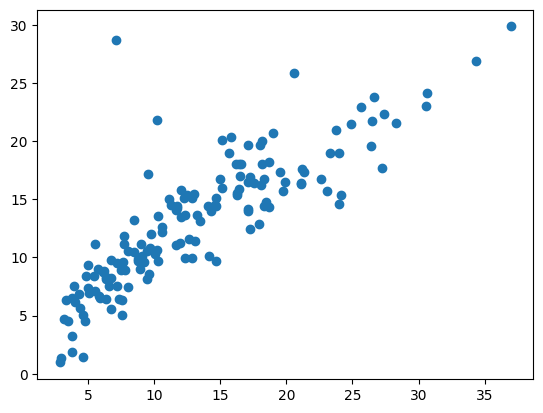

In [110]:
## scatter plot for prediction
plt.scatter(Y_test,reg_pred)

In [111]:
## Residuals
residuals=Y_test-reg_pred

In [112]:
residuals

173   -2.073487
274   -1.010200
491    1.865062
72    -1.624280
452    0.393646
         ...   
441    2.163447
23     3.434580
225    3.193211
433   -1.813860
447   -1.568564
Name: LSTAT, Length: 152, dtype: float64

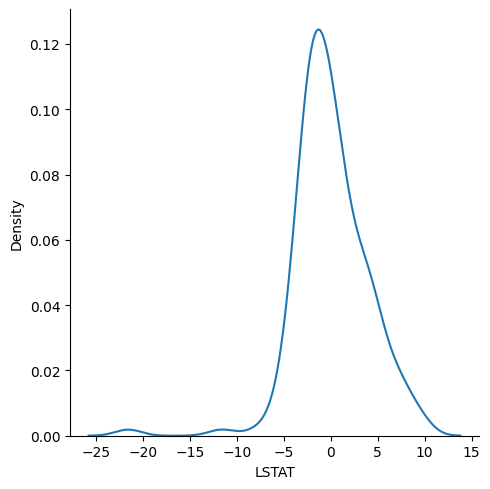

In [113]:
## Plot this residuals
sns.displot(residuals,kind="kde")

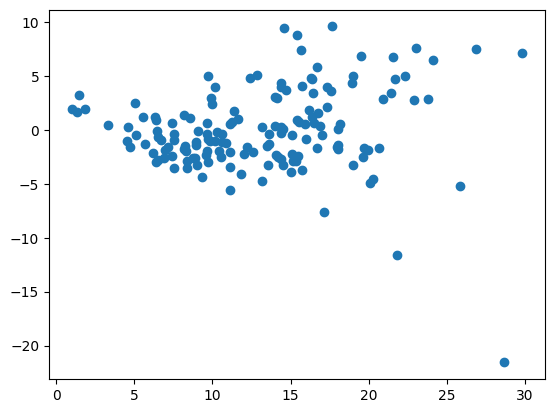

In [114]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [115]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test,reg_pred))
print(mean_squared_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

2.789664530429787
14.72007576871661
3.8366750929309363


## R square and adjusted R square

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [116]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.7143195684536561


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:
R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [117]:
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6896565096151228

## New Data Predictions

## Pickling The Model For Deployment

In [123]:
import pickle

In [124]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [125]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [132]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# Make a prediction on the first data point
prediction = pickled_model.predict(X_scaled[0].reshape(1, -1))

In [133]:
print(prediction)

[9.06741333]
